In [14]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch.nn.functional as F
from torch import nn, optim

import sys
sys.path.append("./../../")

from modules.dvae.model import DVAE
from modules.clip.model import CLIP, DVAECLIP
from config_reader import ConfigReader
from datasets.mnist_loader import MNISTData
from utilities.md_mnist_utils import LabelsInfo
from notebooks.utils import show
from modules.common_utils import latent_to_img, img_to_latent

In [15]:
config_dir_path = '/u/82/sukhoba1/unix/Desktop/TA-VQVAE/configs/'
config_path = config_dir_path + 'clip_mnistmd.yaml'
CONFIG = ConfigReader(config_path=config_path)

In [16]:
data_source = MNISTData(
    img_type=CONFIG.dataset_type,
    root_path=CONFIG.root_path,
    batch_size=CONFIG.BATCH_SIZE,
    custom_transform_version=None)

train_loader = data_source.get_train_loader(8)

data_source_1 = MNISTData(
    img_type=CONFIG.dataset_type,
    root_path=CONFIG.root_path,
    batch_size=CONFIG.BATCH_SIZE,
    custom_transform_version=1)

train_loader_1 = data_source_1.get_train_loader(8)

TypeError: __init__() got an unexpected keyword argument 'custom_transform_version'

In [ ]:
if CONFIG.use_vae:
    dvae = DVAE(
        in_channels=CONFIG.img_channels,
        vocab_size=CONFIG.vae_vocab_size,
        num_x2downsamples=CONFIG.vae_num_x2downsamples,
        num_resids_downsample=CONFIG.vae_num_resids_downsample,
        num_resids_bottleneck=CONFIG.vae_num_resids_bottleneck,
        hidden_dim=CONFIG.vae_hidden_dim,
        device=CONFIG.DEVICE)

    dvae.eval()

    dvae.load_model(
        root_path=CONFIG.vae_model_path,
        model_name=CONFIG.vae_model_name)

In [17]:
!git pull

remote: Support for password authentication was removed on August 13, 2021. Please use a personal access token instead.
remote: Please see https://github.blog/2020-12-15-token-authentication-requirements-for-git-operations/ for more information.
fatal: unable to access 'https://github.com/AndrewSukhobok95/TA-VQVAE.git/': The requested URL returned error: 403


In [6]:
img, txt = next(iter(train_loader))
img = img.to(CONFIG.DEVICE)
txt = txt.permute(1, 0).to(CONFIG.DEVICE)

In [7]:
if CONFIG.use_vae:
    with torch.no_grad():
        img_recon = dvae.get_reconstruction(img)

In [ ]:
img, txt = next(iter(train_loader))

img_1, txt = next(iter(train_loader_1))

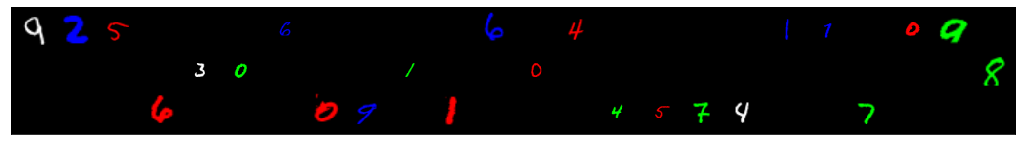

In [12]:
show(img, figsize=(18, 18))

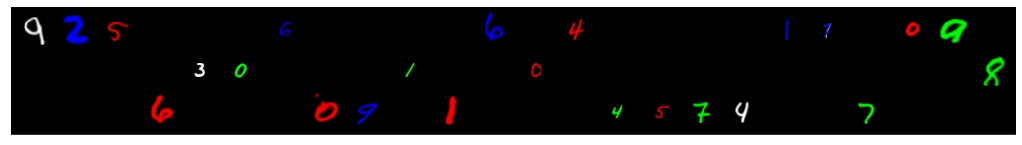

In [13]:
show(img_1, figsize=(18, 18))

In [16]:
# model = DVAECLIP(
#     img_latent_height=32,
#     img_latent_width=32,
#     img_latent_channels=256,
#     txt_max_length=12,
#     txt_vocab_size=20,
#     embed_dim=128,
#     num_blocks=8,
#     hidden_dim=256,
#     n_attn_heads=8,
#     dropout_prob=0.1,
#     device=DEVICE
# )

# optimizer = optim.Adam(model.parameters(), lr=0.001)

# iteration = 0
# for epoch in range(100):
#     for batch_index, (img, txt) in enumerate(train_loader):
#         current_batch_size = img.size(0)

#         img = img.to(DEVICE)
#         txt = txt.permute(1, 0).to(DEVICE)
#         labels = torch.arange(current_batch_size).to(DEVICE)
        
#         imglat = img_to_latent(img, dvae)
        
#         logits_per_image, logits_per_text = model(imglat, txt)

#         loss_img = F.cross_entropy(logits_per_image, labels)
#         loss_txt = F.cross_entropy(logits_per_text, labels)
#         loss = (loss_img + loss_txt) / 2
        
#         loss.backward()
        
#         if iteration % 20 == 0:
#             print("Epoch: {} Iter: {} Loss: {}".format(epoch, iteration, round(loss.item(), 5)))

#         if (batch_index + 1) % 4 == 0:
#             optimizer.step()
#             optimizer.zero_grad()

#             iteration += 1    
        
#         optimizer.step()
#         optimizer.zero_grad()
        
#         iteration += 1